<a href="https://colab.research.google.com/github/Nadiana-Kelly/Aprendizagem_Automatica/blob/main/Lista02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import matplotlib.pyplot as plt

### 1ª QUESTÃO

Considere o conjunto de dados disponível em breastcancer.csv, organizado
em 31 colunas, sendo as 30 primeiras colunas os atributos e a última coluna a
saída. Os 30 atributos coletados de exames médicos são usados no diagnóstico
do câncer de mama, sendo 1 a classe positiva e 0 a classe negativa. Maiores
detalhes sobre os dados podem ser conferidos em https://scikit-learn.org/
stable/datasets/toy_dataset.html#breast-cancer-dataset.



a) Considerando uma validação cruzada em 10 folds, avalie modelos de classificação binária nos dados em questão. Para tanto, use as abordagens
abaixo:

- Regressão logística (treinado com GD ou SGD);
- Análise do discriminante Gaussiano;
- Naive Bayes Gaussiano;

b) Para cada modelo criado, reporte valor médio e desvio padrão da acurácia
global e da acurácia por classe.

Fold 1: Acurácia = 0.9821 | Classe 0 = 1.0000 | Classe 1 = 0.9600
Fold 2: Acurácia = 1.0000 | Classe 0 = 1.0000 | Classe 1 = 1.0000
Fold 3: Acurácia = 1.0000 | Classe 0 = 1.0000 | Classe 1 = 1.0000
Fold 4: Acurácia = 0.9464 | Classe 0 = 1.0000 | Classe 1 = 0.8500
Fold 5: Acurácia = 0.9643 | Classe 0 = 0.9487 | Classe 1 = 1.0000
Fold 6: Acurácia = 0.9643 | Classe 0 = 0.9706 | Classe 1 = 0.9545
Fold 7: Acurácia = 0.9643 | Classe 0 = 1.0000 | Classe 1 = 0.9259
Fold 8: Acurácia = 0.9821 | Classe 0 = 0.9756 | Classe 1 = 1.0000
Fold 9: Acurácia = 0.9643 | Classe 0 = 0.9394 | Classe 1 = 1.0000
Fold 10: Acurácia = 0.9643 | Classe 0 = 0.9697 | Classe 1 = 0.9565

Resultados gerais:
Acurácia média global: 0.9732
Desvio padrão da acurácia global: 0.0165
Acurácia média da classe 0: 0.9804
Desvio padrão da classe 0: 0.0220
Acurácia média da classe 1: 0.9647
Desvio padrão da classe 1: 0.0459


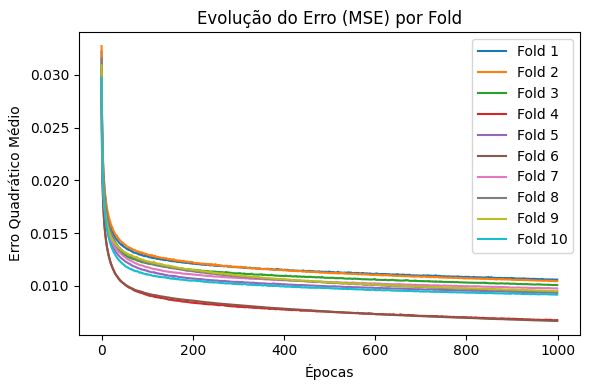

In [10]:
dados_breastcancer = np.genfromtxt('breastcancer.csv', delimiter=',')
np.random.seed(42)
np.random.shuffle(dados_breastcancer)

X = dados_breastcancer[:, :-1]
y = dados_breastcancer[:, -1].astype(int)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression_sgd(X, y, alpha, epocas):
    m = len(y)
    w = np.zeros((X.shape[1], 1))
    mse = np.zeros(epocas)

    for t in range(epocas):
        for i in np.random.permutation(m):
            xi = X[i:i+1].T
            yi = y[i]
            y_pred = sigmoid(xi.T @ w)
            erro = yi - y_pred
            w += alpha * erro * xi

        y_pred_total = sigmoid(X @ w)
        mse[t] = np.mean((y - y_pred_total.flatten()) ** 2)

    return w, mse

# Implementação de validação cruzada
def k_fold_split(X, y, k=10):
    m = len(X)
    indices = np.random.permutation(m)
    fold_size = m // k
    folds = []

    for i in range(k):
        test_idx = indices[i * fold_size : (i + 1) * fold_size]
        train_idx = np.setdiff1d(indices, test_idx)
        folds.append((train_idx, test_idx))

    return folds


def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def confusion_matrix_manual(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tn, fp, fn, tp

folds = k_fold_split(X, y, k=10)

accuracies = []
accuracies_0 = []
accuracies_1 = []
mses_por_fold = []

alpha = 0.01
epocas = 1000

for fold, (train_idx, test_idx) in enumerate(folds):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]


    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    std[std == 0] = 1

    X_train_norm = (X_train - mean) / std
    X_test_norm = (X_test - mean) / std


    X_train_bias = np.c_[np.ones((X_train_norm.shape[0], 1)), X_train_norm]
    X_test_bias = np.c_[np.ones((X_test_norm.shape[0], 1)), X_test_norm]

    # Treinamento
    w, mse = logistic_regression_sgd(X_train_bias, y_train, alpha, epocas)

    # Predição
    y_pred_probs = sigmoid(X_test_bias @ w).flatten()
    y_pred_labels = (y_pred_probs >= 0.5).astype(int)

    acc = accuracy(y_test, y_pred_labels)
    accuracies.append(acc)
    mses_por_fold.append(mse)

    tn, fp, fn, tp = confusion_matrix_manual(y_test, y_pred_labels)
    acc_class_0 = tn / (tn + fp) if (tn + fp) > 0 else 0
    acc_class_1 = tp / (tp + fn) if (tp + fn) > 0 else 0

    accuracies_0.append(acc_class_0)
    accuracies_1.append(acc_class_1)

    print(f"Fold {fold+1}: Acurácia = {acc:.4f} | Classe 0 = {acc_class_0:.4f} | Classe 1 = {acc_class_1:.4f}")


print("\nResultados gerais:")
print(f"Acurácia média global: {np.mean(accuracies):.4f}")
print(f"Desvio padrão da acurácia global: {np.std(accuracies):.4f}")
print(f"Acurácia média da classe 0: {np.mean(accuracies_0):.4f}")
print(f"Desvio padrão da classe 0: {np.std(accuracies_0):.4f}")
print(f"Acurácia média da classe 1: {np.mean(accuracies_1):.4f}")
print(f"Desvio padrão da classe 1: {np.std(accuracies_1):.4f}")


plt.figure(figsize=(6, 4))
for i, mse in enumerate(mses_por_fold):
    plt.plot(mse, label=f'Fold {i+1}')
plt.xlabel('Épocas')
plt.ylabel('Erro Quadrático Médio')
plt.title('Evolução do Erro (MSE) por Fold')
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
dados_breastcancer = np.genfromtxt('breastcancer.csv', delimiter=',')
X = dados_breastcancer[:, :-1]
y = dados_breastcancer[:, -1].astype(int)

class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.priors = {}

        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = np.mean(X_c, axis=0)
            self.var[c] = np.var(X_c, axis=0) + 1e-9
            self.priors[c] = X_c.shape[0] / X.shape[0]

    def _gaussian_prob(self, x, mean, var):
        numerator = np.exp(- (x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def _predict_instance(self, x):
        posteriors = []
        for c in self.classes:
            prior = np.log(self.priors[c])
            prob = self._gaussian_prob(x, self.mean[c], self.var[c])
            prob = np.maximum(prob, 1e-9)
            posterior = prior + np.sum(np.log(prob))
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        return np.array([self._predict_instance(x) for x in X])

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def confusion_matrix_manual(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tn, fp, fn, tp

def k_fold_split(X, y, k=10):
    m = len(X)
    indices = np.random.permutation(m)
    fold_size = m // k
    folds = []

    for i in range(k):
        test_idx = indices[i * fold_size : (i + 1) * fold_size]
        train_idx = np.setdiff1d(indices, test_idx)
        folds.append((train_idx, test_idx))

    return folds

np.random.seed(42)
folds = k_fold_split(X, y, k=10)

accuracies = []
accuracies_0 = []
accuracies_1 = []

for fold, (train_idx, test_idx) in enumerate(folds):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    std[std == 0] = 1

    X_train_norm = (X_train - mean) / std
    X_test_norm = (X_test - mean) / std

    model = GaussianNaiveBayes()
    model.fit(X_train_norm, y_train)
    y_pred = model.predict(X_test_norm)

    acc = accuracy(y_test, y_pred)
    accuracies.append(acc)

    tn, fp, fn, tp = confusion_matrix_manual(y_test, y_pred)
    acc_0 = tn / (tn + fp) if (tn + fp) > 0 else 0
    acc_1 = tp / (tp + fn) if (tp + fn) > 0 else 0
    accuracies_0.append(acc_0)
    accuracies_1.append(acc_1)

    print(f"Fold {fold+1}: Acurácia = {acc:.4f} | Classe 0 = {acc_0:.4f} | Classe 1 = {acc_1:.4f}")

print("\nResultados gerais:")
print("Acurácias globais por fold:", np.round(accuracies, 4))
print("Acurácia média global:", np.round(np.mean(accuracies), 4))
print("Desvio padrão da acurácia global:", np.round(np.std(accuracies), 4))
print("Acurácia média classe 0:", np.round(np.mean(accuracies_0), 4))
print("Desvio padrão classe 0:", np.round(np.std(accuracies_0), 4))
print("Acurácia média classe 1:", np.round(np.mean(accuracies_1), 4))
print("Desvio padrão classe 1:", np.round(np.std(accuracies_1), 4))


Fold 1: Acurácia = 0.9643 | Classe 0 = 0.9744 | Classe 1 = 0.9412
Fold 2: Acurácia = 0.9643 | Classe 0 = 1.0000 | Classe 1 = 0.9200
Fold 3: Acurácia = 0.8929 | Classe 0 = 0.9167 | Classe 1 = 0.8500
Fold 4: Acurácia = 0.9464 | Classe 0 = 0.9487 | Classe 1 = 0.9412
Fold 5: Acurácia = 0.9286 | Classe 0 = 0.9459 | Classe 1 = 0.8947
Fold 6: Acurácia = 0.9643 | Classe 0 = 0.9706 | Classe 1 = 0.9545
Fold 7: Acurácia = 0.8750 | Classe 0 = 0.8421 | Classe 1 = 0.9444
Fold 8: Acurácia = 0.9286 | Classe 0 = 1.0000 | Classe 1 = 0.8333
Fold 9: Acurácia = 0.9464 | Classe 0 = 0.9667 | Classe 1 = 0.9231
Fold 10: Acurácia = 0.9107 | Classe 0 = 0.9714 | Classe 1 = 0.8095

Resultados gerais:
Acurácias globais por fold: [0.9643 0.9643 0.8929 0.9464 0.9286 0.9643 0.875  0.9286 0.9464 0.9107]
Acurácia média global: 0.9321
Desvio padrão da acurácia global: 0.0297
Acurácia média classe 0: 0.9536
Desvio padrão classe 0: 0.044
Acurácia média classe 1: 0.9012
Desvio padrão classe 1: 0.0494


In [23]:
dados = np.genfromtxt('breastcancer.csv', delimiter=',')
X = dados[:, :-1]
y = dados[:, -1].astype(int)

class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.means = {}
        self.vars = {}
        self.priors = {}

        for c in self.classes:
            X_c = X[y == c]
            self.means[c] = X_c.mean(axis=0)
            self.vars[c] = X_c.var(axis=0) + 1e-9
            self.priors[c] = X_c.shape[0] / X.shape[0]

    def predict(self, X):
        y_pred = []
        for x in X:
            posteriors = []
            for c in self.classes:
                mean = self.means[c]
                var = self.vars[c]
                prior = np.log(self.priors[c])
                likelihood = -0.5 * np.log(2 * np.pi * var) - ((x - mean)**2) / (2 * var)
                posterior = prior + np.sum(likelihood)
                posteriors.append(posterior)
            y_pred.append(self.classes[np.argmax(posteriors)])
        return np.array(y_pred)

def k_fold_split(X, y, k=10):
    m = len(X)
    indices = np.random.permutation(m)
    fold_size = m // k
    folds = []

    for i in range(k):
        test_idx = indices[i * fold_size:(i + 1) * fold_size]
        train_idx = np.setdiff1d(indices, test_idx)
        folds.append((train_idx, test_idx))
    return folds

def confusion_matrix(y_true, y_pred):
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    tp = np.sum((y_true == 1) & (y_pred == 1))
    return tn, fp, fn, tp

np.random.seed(42)
folds = k_fold_split(X, y, k=10)

accuracies = []
accuracies_0 = []
accuracies_1 = []

for i, (train_idx, test_idx) in enumerate(folds):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    mean = X_train.mean(axis=0)
    std = X_train.std(axis=0)
    std[std == 0] = 1

    X_train_norm = (X_train - mean) / std
    X_test_norm = (X_test - mean) / std

    model = GaussianNaiveBayes()
    model.fit(X_train_norm, y_train)
    y_pred = model.predict(X_test_norm)

    acc = np.mean(y_pred == y_test)
    accuracies.append(acc)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred)
    acc_0 = tn / (tn + fp) if (tn + fp) > 0 else 0
    acc_1 = tp / (tp + fn) if (tp + fn) > 0 else 0
    accuracies_0.append(acc_0)
    accuracies_1.append(acc_1)

    print(f"Fold {i+1}: Acurácia = {acc:.4f} | Classe 0 = {acc_0:.4f} | Classe 1 = {acc_1:.4f}")


print("\nResultados finais:")
print("Acurácias globais por fold:", np.round(accuracies, 4))
print("Acurácia média global:", np.round(np.mean(accuracies), 4))
print("Desvio padrão da acurácia global:", np.round(np.std(accuracies), 4))
print("Acurácia média classe 0:", np.round(np.mean(accuracies_0), 4))
print("Desvio padrão classe 0:", np.round(np.std(accuracies_0), 4))
print("Acurácia média classe 1:", np.round(np.mean(accuracies_1), 4))
print("Desvio padrão classe 1:", np.round(np.std(accuracies_1), 4))


Fold 1: Acurácia = 0.9643 | Classe 0 = 0.9744 | Classe 1 = 0.9412
Fold 2: Acurácia = 0.9643 | Classe 0 = 1.0000 | Classe 1 = 0.9200
Fold 3: Acurácia = 0.8929 | Classe 0 = 0.9167 | Classe 1 = 0.8500
Fold 4: Acurácia = 0.9464 | Classe 0 = 0.9487 | Classe 1 = 0.9412
Fold 5: Acurácia = 0.9286 | Classe 0 = 0.9459 | Classe 1 = 0.8947
Fold 6: Acurácia = 0.9643 | Classe 0 = 0.9706 | Classe 1 = 0.9545
Fold 7: Acurácia = 0.8750 | Classe 0 = 0.8421 | Classe 1 = 0.9444
Fold 8: Acurácia = 0.9107 | Classe 0 = 1.0000 | Classe 1 = 0.7917
Fold 9: Acurácia = 0.9464 | Classe 0 = 0.9667 | Classe 1 = 0.9231
Fold 10: Acurácia = 0.9107 | Classe 0 = 0.9714 | Classe 1 = 0.8095

Resultados finais:
Acurácias globais por fold: [0.9643 0.9643 0.8929 0.9464 0.9286 0.9643 0.875  0.9107 0.9464 0.9107]
Acurácia média global: 0.9304
Desvio padrão da acurácia global: 0.0304
Acurácia média classe 0: 0.9536
Desvio padrão classe 0: 0.044
Acurácia média classe 1: 0.897
Desvio padrão classe 1: 0.0562


### 2ª QUESTÃO
Considere o conjunto de dados disponível em vehicle.csv, organizado em 19 colunas, sendo as 18 primeiras colunas os atributos e a última coluna a saída. Os 18
atributos caracterizam a silhueta de veículos, extraídos pelo método HIPS (Hierarchical Image Processing System). A tarefa consiste em classificar o veículo
em 4 classes (bus, opel, saab, e van). Maiores detalhes sobre os dados podem
ser conferidos em https://www.openml.org/search?type=data&sort=runs&
id=54.

a) Considerando uma validação cruzada em 10 folds, avalie modelos de classificação multiclasse nos dados em questão. Para tanto, use as abordagens
abaixo:

- Regressão softmax (treinado com GD ou SGD);
- Análise do discriminante Gaussiano;
- Naive Bayes Gaussiano;

b) Para cada modelo criado, reporte valor médio e desvio padrão da acurácia
global e da acurácia por classe.

In [25]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy(y_true, y_pred):
    m = y_true.shape[0]
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.sum(y_true * np.log(y_pred)) / m

def one_hot(y, num_classes):
    return np.eye(num_classes)[y]

def zscore_normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

def encode_labels(y):
    classes = np.unique(y)
    class_to_index = {cls: idx for idx, cls in enumerate(classes)}
    y_encoded = np.array([class_to_index[label] for label in y])
    return y_encoded, classes

def compute_precision_per_class(y_true, y_pred, num_classes):
    precisions = []
    for c in range(num_classes):
        tp = np.sum((y_pred == c) & (y_true == c))
        fp = np.sum((y_pred == c) & (y_true != c))
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        precisions.append(precision)
    return precisions

class SoftmaxRegression:
    def __init__(self, input_dim, num_classes, lr=0.1, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.num_classes = num_classes
        self.W = np.zeros((input_dim, num_classes))
        self.b = np.zeros((1, num_classes))

    def fit(self, X, y):
        m = X.shape[0]
        for _ in range(self.epochs):
            z = np.dot(X, self.W) + self.b
            y_pred = softmax(z)
            loss = cross_entropy(y, y_pred)

            dz = (y_pred - y) / m
            dW = np.dot(X.T, dz)
            db = np.sum(dz, axis=0, keepdims=True)

            self.W -= self.lr * dW
            self.b -= self.lr * db

    def predict(self, X):
        z = np.dot(X, self.W) + self.b
        return np.argmax(softmax(z), axis=1)

dados = np.genfromtxt('vehicle.csv', delimiter=',', dtype=str, skip_header=1)

np.random.seed(42)
np.random.shuffle(dados)

X = dados[:, :-1].astype(float)
y = dados[:, -1]

X = zscore_normalize(X)
y_encoded, classes = encode_labels(y)
num_classes = len(classes)

def split_k_folds(X, y, k=10):
    n = X.shape[0]
    fold_size = n // k
    indices = np.arange(n)
    np.random.seed(42)
    np.random.shuffle(indices)

    folds = []
    for i in range(k):
        start = i * fold_size
        end = (i + 1) * fold_size if i != k - 1 else n
        test_idx = indices[start:end]
        train_idx = np.concatenate((indices[:start], indices[end:]))
        folds.append((train_idx, test_idx))
    return folds

folds = split_k_folds(X, y_encoded, k=10)

accuracies = []
class_accuracies = {cls: [] for cls in classes}

for fold_idx, (train_idx, test_idx) in enumerate(folds):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]
    y_train_oh = one_hot(y_train, num_classes)

    model = SoftmaxRegression(input_dim=X.shape[1], num_classes=num_classes, lr=0.1, epochs=1000)
    model.fit(X_train, y_train_oh)
    y_pred = model.predict(X_test)

    acc = np.mean(y_pred == y_test)
    accuracies.append(acc)

    precisions = compute_precision_per_class(y_test, y_pred, num_classes)
    for i, cls in enumerate(classes):
        class_accuracies[cls].append(precisions[i])

    print(f"Fold {fold_idx+1} - Acurácia: {acc:.4f}")

print("\nResultados finais:")
print(f"Acurácia Global Média: {np.mean(accuracies):.4f}")
print(f"Desvio Padrão da Acurácia Global: {np.std(accuracies):.4f}\n")

print("Acurácia por Classe (média ± desvio padrão):")
for cls in classes:
    valores = class_accuracies[cls]
    media = np.mean(valores)
    desvio = np.std(valores)
    print(f"{cls}: {media:.4f} ± {desvio:.4f}")


Fold 1 - Acurácia: 0.7381
Fold 2 - Acurácia: 0.7738
Fold 3 - Acurácia: 0.7738
Fold 4 - Acurácia: 0.7500
Fold 5 - Acurácia: 0.7500
Fold 6 - Acurácia: 0.7500
Fold 7 - Acurácia: 0.7381
Fold 8 - Acurácia: 0.7381
Fold 9 - Acurácia: 0.7738
Fold 10 - Acurácia: 0.7753

Resultados finais:
Acurácia Global Média: 0.7561
Desvio Padrão da Acurácia Global: 0.0155

Acurácia por Classe (média ± desvio padrão):
0.000000000000000000e+00: 0.8475 ± 0.0737
1.000000000000000000e+00: 0.6356 ± 0.1074
2.000000000000000000e+00: 0.6184 ± 0.1219
3.000000000000000000e+00: 0.8846 ± 0.0449


In [26]:
def stratified_k_fold(X, y, n_splits=10, seed=42):
    np.random.seed(seed)
    folds = [[] for _ in range(n_splits)]
    for label in np.unique(y):
        idx = np.where(y == label)[0]
        np.random.shuffle(idx)
        for i, val in enumerate(idx):
            folds[i % n_splits].append(val)
    fold_indices = []
    for i in range(n_splits):
        test_idx = np.array(folds[i])
        train_idx = np.array([idx for j, fold in enumerate(folds) if j != i for idx in fold])
        fold_indices.append((train_idx, test_idx))
    return fold_indices

def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)

class GaussianDiscriminantAnalysis:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.means = {}
        self.priors = {}
        self.cov = np.cov(X.T) + 1e-6 * np.eye(X.shape[1])
        self.inv_cov = np.linalg.inv(self.cov)

        for cls in self.classes:
            X_c = X[y == cls]
            self.means[cls] = np.mean(X_c, axis=0)
            self.priors[cls] = X_c.shape[0] / X.shape[0]

    def predict(self, X):
        preds = []
        for x in X:
            scores = []
            for cls in self.classes:
                mean = self.means[cls]
                prior = np.log(self.priors[cls])
                score = -0.5 * np.dot(np.dot((x - mean).T, self.inv_cov), (x - mean)) + prior
                scores.append(score)
            preds.append(self.classes[np.argmax(scores)])
        return np.array(preds)


dados_vehicle = np.genfromtxt('vehicle.csv', delimiter=',', dtype=str, skip_header=1)
X = dados_vehicle[:, :-1].astype(float)
y_texto = dados_vehicle[:, -1]

classes_unicas = np.unique(y_texto)
class_to_index = {label: idx for idx, label in enumerate(classes_unicas)}
y = np.array([class_to_index[label] for label in y_texto])
n_classes = len(classes_unicas)


X = (X - X.mean(axis=0)) / X.std(axis=0)


folds = stratified_k_fold(X, y, n_splits=10, seed=42)
accuracies_globais = []
acuracias_por_classe = {cls: [] for cls in range(n_classes)}

for fold_idx, (train_idx, test_idx) in enumerate(folds):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = GaussianDiscriminantAnalysis()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc_global = accuracy_score(y_test, y_pred)
    accuracies_globais.append(acc_global)

    for cls in range(n_classes):
        idx = (y_test == cls)
        if np.sum(idx) > 0:
            acc_cls = accuracy_score(y_test[idx], y_pred[idx])
            acuracias_por_classe[cls].append(acc_cls)

    print(f"Fold {fold_idx + 1}: Acurácia Global = {acc_global:.4f}")

print("\nResultados finais:")
print(f"Acurácia Global Média: {np.mean(accuracies_globais):.4f}")
print(f"Desvio Padrão da Acurácia Global: {np.std(accuracies_globais):.4f}\n")

print("Acurácia por Classe (média ± desvio padrão):")
for cls in range(n_classes):
    accs = acuracias_por_classe[cls]
    nome_classe = classes_unicas[cls]
    print(f"{nome_classe}: {np.mean(accs):.4f} ± {np.std(accs):.4f}")


Fold 1: Acurácia Global = 0.7674
Fold 2: Acurácia Global = 0.7674
Fold 3: Acurácia Global = 0.8000
Fold 4: Acurácia Global = 0.7647
Fold 5: Acurácia Global = 0.7882
Fold 6: Acurácia Global = 0.8000
Fold 7: Acurácia Global = 0.7765
Fold 8: Acurácia Global = 0.7738
Fold 9: Acurácia Global = 0.7561
Fold 10: Acurácia Global = 0.8049

Resultados finais:
Acurácia Global Média: 0.7799
Desvio Padrão da Acurácia Global: 0.0163

Acurácia por Classe (média ± desvio padrão):
0.000000000000000000e+00: 0.9543 ± 0.0352
1.000000000000000000e+00: 0.6136 ± 0.0923
2.000000000000000000e+00: 0.6177 ± 0.0433
3.000000000000000000e+00: 0.9447 ± 0.0471


In [27]:
def stratified_k_fold(X, y, n_splits=10, seed=42):
    np.random.seed(seed)
    folds = [[] for _ in range(n_splits)]
    for label in np.unique(y):
        idx = np.where(y == label)[0]
        np.random.shuffle(idx)
        for i, val in enumerate(idx):
            folds[i % n_splits].append(val)
    fold_indices = []
    for i in range(n_splits):
        test_idx = np.array(folds[i])
        train_idx = np.array([idx for j, fold in enumerate(folds) if j != i for idx in fold])
        fold_indices.append((train_idx, test_idx))
    return fold_indices

def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)

class NaiveBayesGaussiano:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.estatisticas = {}

        for c in self.classes:
            X_c = X[y == c]
            self.estatisticas[c] = {
                'mean': X_c.mean(axis=0),
                'var': X_c.var(axis=0) + 1e-6,
                'prior': X_c.shape[0] / X.shape[0]
            }

    def _log_prob_gaussiana(self, x, mean, var):
        return -0.5 * np.sum(np.log(2 * np.pi * var)) - 0.5 * np.sum(((x - mean) ** 2) / var)

    def predict(self, X):
        predicoes = []
        for x in X:
            scores = {}
            for c in self.classes:
                stats = self.estatisticas[c]
                log_prior = np.log(stats['prior'])
                log_likelihood = self._log_prob_gaussiana(x, stats['mean'], stats['var'])
                scores[c] = log_prior + log_likelihood
            predicoes.append(max(scores, key=scores.get))
        return np.array(predicoes)


dados_vehicle = np.genfromtxt('vehicle.csv', delimiter=',', dtype=str, skip_header=1)
X = dados_vehicle[:, :-1].astype(float)
y_texto = dados_vehicle[:, -1]

classes_unicas = np.unique(y_texto)
class_to_index = {rotulo: idx for idx, rotulo in enumerate(classes_unicas)}
y = np.array([class_to_index[rot] for rot in y_texto])
n_classes = len(classes_unicas)

X = (X - X.mean(axis=0)) / X.std(axis=0)

folds = stratified_k_fold(X, y, n_splits=10, seed=42)
accuracies_globais = []
acuracias_por_classe = {cls: [] for cls in range(n_classes)}

for fold_idx, (train_idx, test_idx) in enumerate(folds):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    modelo = NaiveBayesGaussiano()
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)

    acc_global = accuracy_score(y_test, y_pred)
    accuracies_globais.append(acc_global)

    for cls in range(n_classes):
        idx = (y_test == cls)
        if np.sum(idx) > 0:
            acc_cls = accuracy_score(y_test[idx], y_pred[idx])
            acuracias_por_classe[cls].append(acc_cls)

    print(f"Fold {fold_idx + 1}: Acurácia Global = {acc_global:.4f}")

print("\nResultados finais:")
print(f"Acurácia Global Média: {np.mean(accuracies_globais):.4f}")
print(f"Desvio Padrão da Acurácia Global: {np.std(accuracies_globais):.4f}\n")

print("Acurácia por Classe (média ± desvio padrão):")
for cls in range(n_classes):
    accs = acuracias_por_classe[cls]
    nome_classe = classes_unicas[cls]
    print(f"{nome_classe}: {np.mean(accs):.4f} ± {np.std(accs):.4f}")

Fold 1: Acurácia Global = 0.5233
Fold 2: Acurácia Global = 0.4884
Fold 3: Acurácia Global = 0.4941
Fold 4: Acurácia Global = 0.4353
Fold 5: Acurácia Global = 0.4471
Fold 6: Acurácia Global = 0.4353
Fold 7: Acurácia Global = 0.4588
Fold 8: Acurácia Global = 0.4762
Fold 9: Acurácia Global = 0.3415
Fold 10: Acurácia Global = 0.5000

Resultados finais:
Acurácia Global Média: 0.4600
Desvio Padrão da Acurácia Global: 0.0482

Acurácia por Classe (média ± desvio padrão):
0.000000000000000000e+00: 0.1788 ± 0.0731
1.000000000000000000e+00: 0.4329 ± 0.0928
2.000000000000000000e+00: 0.3920 ± 0.0971
3.000000000000000000e+00: 0.8737 ± 0.0463
